In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

In [59]:
# Definition of several utility functions.
def mod(bits, modtype):
    symbols = []
    ip = np.zeros((len(bits),1), dtype=complex)
    inc = 0
    if(modtype==2):
        symbols_bpsk = [-1.0 + 1j*0.0, 1.0 + 1j*0.0]
        for b in bits:
            ip[inc] = symbols_bpsk[b[0]]
            inc += 1
        # Normalization of energy to 1.
        symbols = (1.0/np.sqrt(1.0))*ip
    elif(modtype==4):
        symbols_qpsk = [-1.0 - 1j*1.0, -1.0 + 1j*1.0, 1.0 - 1j*1.0, 1.0 + 1j*1.0]
        for b in bits:
            ip[inc] = symbols_qpsk[b[0]]
            inc += 1
        # Normalization of energy to 1.
        symbols = (1.0/np.sqrt(2.0))*ip
    elif(modtype==16):
        symbols_16qam = [-3.0 - 1j*3.0, -3.0 - 1j*1.0, -3.0 + 1j*3.0, -3.0 + 1j*1.0, 
                         -1.0 - 1j*3.0, -1.0 - 1j*1.0, -1.0 + 1j*3.0, -1.0 + 1j*1.0, 
                         +3.0 - 1j*3.0, +3.0 - 1j*1.0, +3.0 + 1j*3.0, +3.0 + 1j*1.0,
                         +1.0 - 1j*3.0, +1.0 - 1j*1.0, +1.0 + 1j*3.0, +1.0 + 1j*1.0
                        ]
        for b in bits:
            ip[inc] = symbols_16qam[b[0]]
            inc += 1
        # Normalization of energy to 1.
        symbols = (1.0/np.sqrt(10.0))*ip
    else:
        print('Error: Modulation not implemented.')
        
    return symbols

In [79]:
# Number of symbols to be transmitted.
N = 100

# Create Es/N0 vector.
EsN0dB = 3
EsN0Lin = 10.0**(-(EsN0dB/10.0))

# Generate BPSK symbols.
bits_bpsk = np.random.randint(0, 2, (N, 1))
# Modulate the binary stream into BPSK symbols.
bpsk = mod(bits_bpsk, 2)
# Pass BPSK symbols through AWGN channel.
noise = np.sqrt(EsN0Lin/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
y_bpsk = bpsk + noise

# Generate QPSK symbols.
bits_qpsk = np.random.randint(0, 4, (N, 1))
# Modulate the binary stream into QPSK symbols.
qpsk = mod(bits_qpsk, 4)
# Pass QPSK symbols through AWGN channel.
noise = np.sqrt(EsN0Lin/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))    
y_qpsk = qpsk + noise

# Generate 16QAM symbols.
bits_16qam = np.random.randint(0, 16, (N, 1))
# Modulate the binary stream into 16QAM symbols.
qam16 = mod(bits_16qam, 16)
# Pass 16QAM symbols through AWGN channel.
noise = np.sqrt(EsN0Lin/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))    
y_qam16 = qam16 + noise

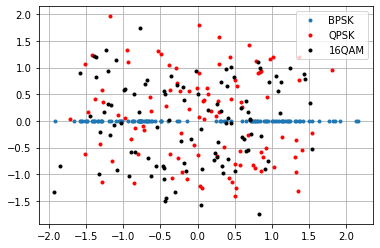

In [80]:
plt.plot(np.real(y_bpsk), np.zeros((N,1)), '.', label='BPSK')
plt.plot(np.real(y_qpsk), np.imag(y_qpsk), 'r.', label='QPSK')
plt.plot(np.real(y_qam16), np.imag(y_qam16), 'k.', label='16QAM')
plt.grid()
plt.legend()
plt.savefig('modulation_classification', dpi=600)
plt.show()

## Using SVM for classifying BPSK symbols

In [81]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(np.real(y_bpsk), bits_bpsk.ravel())

bits_bpsk_pred = clf.predict(np.real(y_bpsk))

error = 0
for i in range(0, len(bits_bpsk_pred)):
    if bits_bpsk_pred[i] != bits_bpsk.ravel()[i]:
        error += 1
        
print('BPSK BER:', error/len(bits_bpsk_pred))

BPSK BER: 0.02
